In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.shape


(7043, 33)

In [10]:
df.columns


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [11]:
df.dtypes



CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [12]:
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.isnull().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
# Fill missing values in 'Churn Reason' column with the mode (most frequent value)
df['Churn Reason'] = df['Churn Reason'].fillna(df['Churn Reason'].mode()[0])

# Check if there are any missing values left
print(df.isnull().sum())


CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64


In [6]:
# Step 1: Unnecessary columns ko remove karna

df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 
         'Lat Long', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Verify by checking columns again
df.columns


Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [8]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [9]:
df.select_dtypes(include=['object']).columns


Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges', 'Churn Label', 'Churn Reason'],
      dtype='object')

In [10]:
# List of columns with Yes/No values
yes_no_cols = ['Phone Service', 'Paperless Billing', 'Partner', 'Dependents']

# Map Yes to 1 and No to 0
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [11]:
# List of remaining categorical columns (excluding 'CustomerID' and other unnecessary ones)
remaining_cat_cols = ['Gender', 'Internet Service', 'Online Security', 'Online Backup',
                      'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                      'Contract', 'Payment Method']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=remaining_cat_cols, drop_first=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Convert 'Churn Label' column to numeric
df['Churn Label'] = le.fit_transform(df['Churn Label'])

# Now, 'Churn Label' will have values 0 and 1 instead of 'No' and 'Yes'



In [16]:
df.dtypes


Senior Citizen                             object
Partner                                     int64
Dependents                                  int64
Tenure Months                               int64
Phone Service                               int64
Multiple Lines                             object
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                              object
Churn Label                                 int64
Churn Value                                 int64
Churn Score                                 int64
CLTV                                        int64
Churn Reason                               object
Gender_Male                                  bool
Internet Service_Fiber optic                 bool
Internet Service_No                          bool
Online Security_No internet service          bool
Online Security_Yes                          bool
Online Backup_No internet service            bool


In [17]:
# If 'Senior Citizen' has 'Yes'/'No' values, convert them to 1/0 using Label Encoding
df['Senior Citizen'] = le.fit_transform(df['Senior Citizen'])


In [18]:
df = pd.get_dummies(df, columns=['Churn Reason'], drop_first=True)


In [19]:
# Remove any unwanted spaces or non-numeric characters and convert it to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [23]:
# Renaming the column if there is a space or different characters
df.rename(columns={"Churn Reason ": "Churn Reason"}, inplace=True)


In [26]:
# Clean the column names by stripping any extra spaces
df.columns = df.columns.str.strip()


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all categorical columns
df['Senior Citizen'] = le.fit_transform(df['Senior Citizen'])  # If 'Yes'/'No' values
df['Multiple Lines'] = le.fit_transform(df['Multiple Lines'])  # If 'Yes'/'No' values

df['Gender_Male'] = le.fit_transform(df['Gender_Male'])  # If 'True'/'False' values
df['Internet Service_Fiber optic'] = le.fit_transform(df['Internet Service_Fiber optic'])  # If categorical values
df['Internet Service_No'] = le.fit_transform(df['Internet Service_No'])  # If categorical values
df['Online Security_No internet service'] = le.fit_transform(df['Online Security_No internet service'])  # If categorical values
df['Online Security_Yes'] = le.fit_transform(df['Online Security_Yes'])  # If categorical values
df['Online Backup_No internet service'] = le.fit_transform(df['Online Backup_No internet service'])  # If categorical values
df['Online Backup_Yes'] = le.fit_transform(df['Online Backup_Yes'])  # If categorical values
df['Device Protection_No internet service'] = le.fit_transform(df['Device Protection_No internet service'])  # If categorical values
df['Device Protection_Yes'] = le.fit_transform(df['Device Protection_Yes'])  # If categorical values
df['Tech Support_No internet service'] = le.fit_transform(df['Tech Support_No internet service'])  # If categorical values
df['Tech Support_Yes'] = le.fit_transform(df['Tech Support_Yes'])  # If categorical values
df['Contract_Two year'] = le.fit_transform(df['Contract_Two year'])  # If categorical values
df['Payment Method_Credit card (automatic)'] = le.fit_transform(df['Payment Method_Credit card (automatic)'])  # If categorical values
df['Payment Method_Electronic check'] = le.fit_transform(df['Payment Method_Electronic check'])  # If categorical values
df['Payment Method_Mailed check'] = le.fit_transform(df['Payment Method_Mailed check'])  # If categorical values

# Now, let's handle the Total Charges column, which is of type 'object'
# We need to convert it into a numeric column.
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Handle non-numeric values as NaN

# Apply scaling to the numeric columns
scaler = StandardScaler()

# Select only the columns that are numeric for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale the numeric columns
scaled_features = scaler.fit_transform(df[numeric_cols])

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

# Merge the scaled features back with the original dataframe
df_scaled = pd.concat([df.drop(columns=numeric_cols), scaled_df], axis=1)

# Check the updated dataframe
print(df_scaled.head())


   Streaming TV_No internet service  Streaming TV_Yes  \
0                             False             False   
1                             False             False   
2                             False              True   
3                             False              True   
4                             False              True   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                 False                 False   
1                                 False                 False   
2                                 False                  True   
3                                 False                  True   
4                                 False                  True   

   Contract_One year  Churn Reason_Attitude of support person  \
0              False                                    False   
1              False                                    False   
2              False                                    False   
3     

In [40]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = scaled_df.drop(columns=['Churn Label'])  # Drop 'Churn Label' from features
y = df['Churn Label']  # Target variable (what we want to predict)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the training and testing data
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")


Training data size: 5634
Testing data size: 1409


In [ ]:
# After scaling and before model fitting
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # ya median bhi le sakte ho
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


# Now train
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [43]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


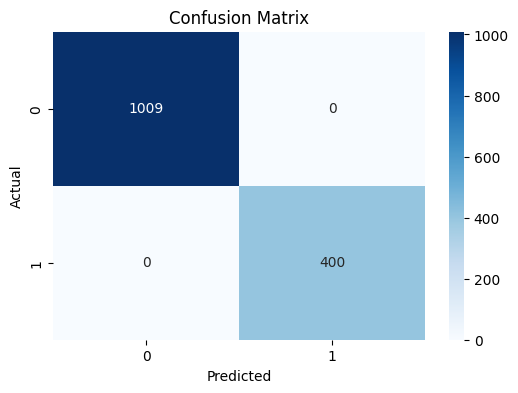

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [45]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [46]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head(10))


      Actual  Predicted
185        1          1
2715       0          0
3825       0          0
1807       1          1
132        1          1
1263       1          1
3732       0          0
1672       1          1
811        1          1
2526       0          0


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [48]:
# Create a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [49]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)